## Diabetes Prediction

In [1]:
from sklearn.datasets import load_diabetes

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#To display all the visualisation graph we use the following code message:
%matplotlib inline 

In [3]:
dataset=load_diabetes()

In [4]:
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [5]:
dataset

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [6]:
import pandas as pd
df_diabetes=pd.DataFrame(dataset.data,columns=['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6'])
df_diabetes.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641

In [7]:
#Independent and dependent Features
X=df_diabetes
y=dataset['target']

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [9]:
X_train.head()

age       sex       bmi        bp        s1        s2        s3  \
225  0.030811  0.050680  0.032595  0.049415 -0.040096 -0.043589 -0.069172   
412  0.074401 -0.044642  0.085408  0.063187  0.014942  0.013091  0.015505   
118 -0.056370  0.050680 -0.010517  0.025315  0.023198  0.040022 -0.039719   
114  0.023546 -0.044642  0.110198  0.063187  0.013567 -0.032942 -0.024993   
364  0.001751  0.050680 -0.006206 -0.019442 -0.009825  0.004949 -0.039719   

           s4        s5        s6  
225  0.034309  0.063015  0.003064  
412 -0.002592  0.006207  0.085907  
118  0.034309  0.020609  0.056912  
114  0.020655  0.099241  0.023775  
364  0.034309  0.014821  0.098333

In [10]:
#Correlation
X_train.corr()

age       sex       bmi        bp        s1        s2        s3  \
age  1.000000  0.136522  0.181976  0.308406  0.261534  0.200301 -0.023100   
sex  0.136522  1.000000  0.044746  0.165128  0.033717  0.128023 -0.344052   
bmi  0.181976  0.044746  1.000000  0.384534  0.246802  0.255519 -0.372335   
bp   0.308406  0.165128  0.384534  1.000000  0.242052  0.164355 -0.113747   
s1   0.261534  0.033717  0.246802  0.242052  1.000000  0.891476  0.044128   
s2   0.200301  0.128023  0.255519  0.164355  0.891476  1.000000 -0.190767   
s3  -0.023100 -0.344052 -0.372335 -0.113747  0.044128 -0.190767  1.000000   
s4   0.165340  0.320619  0.431946  0.209316  0.556987  0.653120 -0.732862   
s5   0.270981  0.121299  0.448657  0.362476  0.528922  0.307541 -0.388778   
s6   0.262201  0.159936  0.394699  0.376421  0.323666  0.298647 -0.304091   

           s4        s5        s6  
age  0.165340  0.270981  0.262201  
sex  0.320619  0.121299  0.159936  
bmi  0.431946  0.448657  0.394699  
bp   0.209316  0.362476  0.376421  
s1   0.556987  0.528922  0.323666  
s2   0.653120  0.307541  0.298647  
s3  -0.732862 -0.388778 -0.304091  
s4   1.000000  0.629707  0.441489  
s5   0.629707  1.000000  0.464878  
s6   0.441489  0.464878  1.000000

<Axes: >

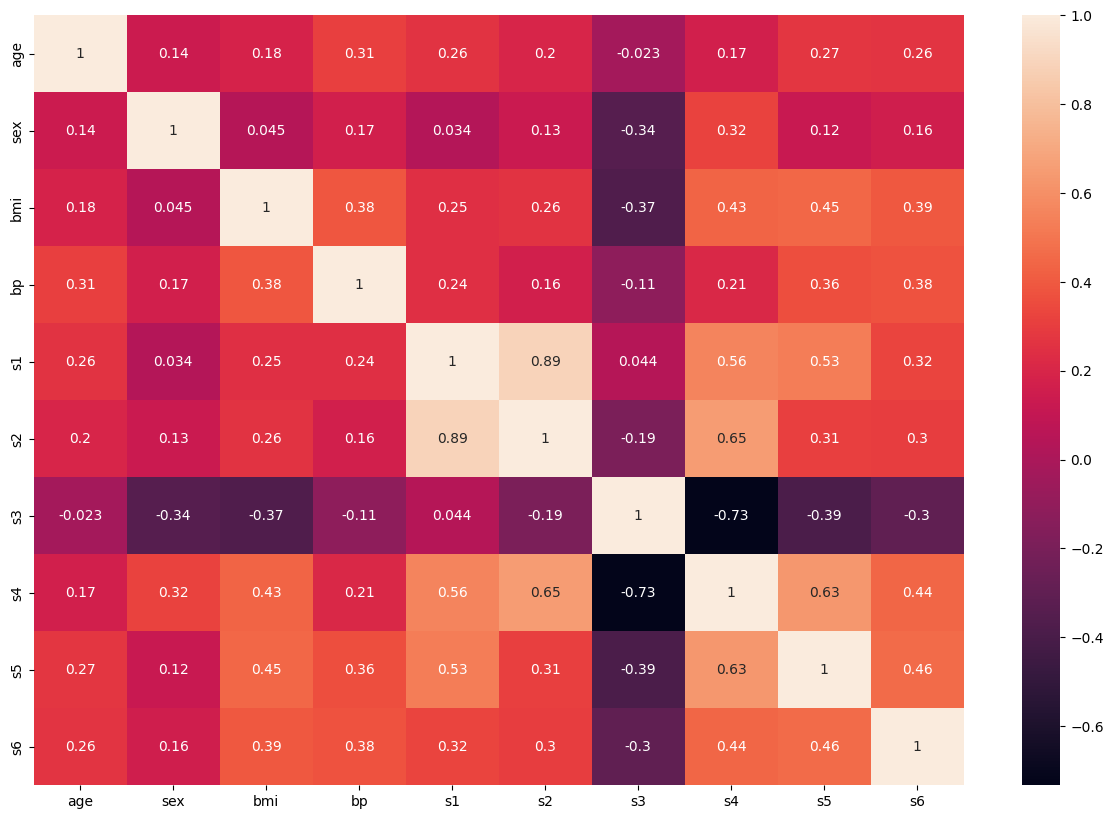

In [11]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(),annot=True)

In [12]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
regressor.fit(X_train,y_train)


DecisionTreeRegressor()

## Hyperparameter Tuning

In [13]:
#sklearn decision tree regressor search maar
param={
    'criterion':['squared_error','friedman_mse','absolute_error'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,10,15,20,25],
    'max_features':['auto','sqrt','log2']
}

In [14]:
param

{'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
 'splitter': ['best', 'random'],
 'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
 'max_features': ['auto', 'sqrt', 'log2']}

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:

regressor=DecisionTreeRegressor()

In [17]:
#We can use other scoring parameters also
grid=GridSearchCV(regressor,param_grid=param,cv=5,scoring='neg_mean_squared_error')

In [18]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [19]:
grid.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'best'}

In [20]:
## predictions
y_pred=grid.predict(X_test)

In [21]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


In [22]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.3140781552380473
47.97133354982089
3702.817218625557


In [23]:
selectedmodel=DecisionTreeRegressor(criterion='friedman_mse',max_depth=4,max_features='log2',splitter='random')

In [24]:
selectedmodel.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=4,
                      max_features='log2', splitter='random')

[Text(0.49107142857142855, 0.9, 'x[2] <= -0.069\nfriedman_mse = 6148.282\nsamples = 309\nvalue = 153.903'),
 Text(0.26785714285714285, 0.7, 'x[8] <= -0.014\nfriedman_mse = 962.743\nsamples = 12\nvalue = 86.917'),
 Text(0.3794642857142857, 0.8, 'True  '),
 Text(0.14285714285714285, 0.5, 'x[0] <= -0.069\nfriedman_mse = 979.111\nsamples = 9\nvalue = 92.333'),
 Text(0.07142857142857142, 0.3, 'x[9] <= -0.061\nfriedman_mse = 874.25\nsamples = 6\nvalue = 105.5'),
 Text(0.03571428571428571, 0.1, 'friedman_mse = 16.0\nsamples = 2\nvalue = 138.0'),
 Text(0.10714285714285714, 0.1, 'friedman_mse = 511.188\nsamples = 4\nvalue = 89.25'),
 Text(0.21428571428571427, 0.3, 'x[7] <= -0.059\nfriedman_mse = 148.667\nsamples = 3\nvalue = 66.0'),
 Text(0.17857142857142858, 0.1, 'friedman_mse = 0.0\nsamples = 1\nvalue = 77.0'),
 Text(0.25, 0.1, 'friedman_mse = 132.25\nsamples = 2\nvalue = 60.5'),
 Text(0.39285714285714285, 0.5, 'x[1] <= -0.017\nfriedman_mse = 561.556\nsamples = 3\nvalue = 70.667'),
 Text(0.35

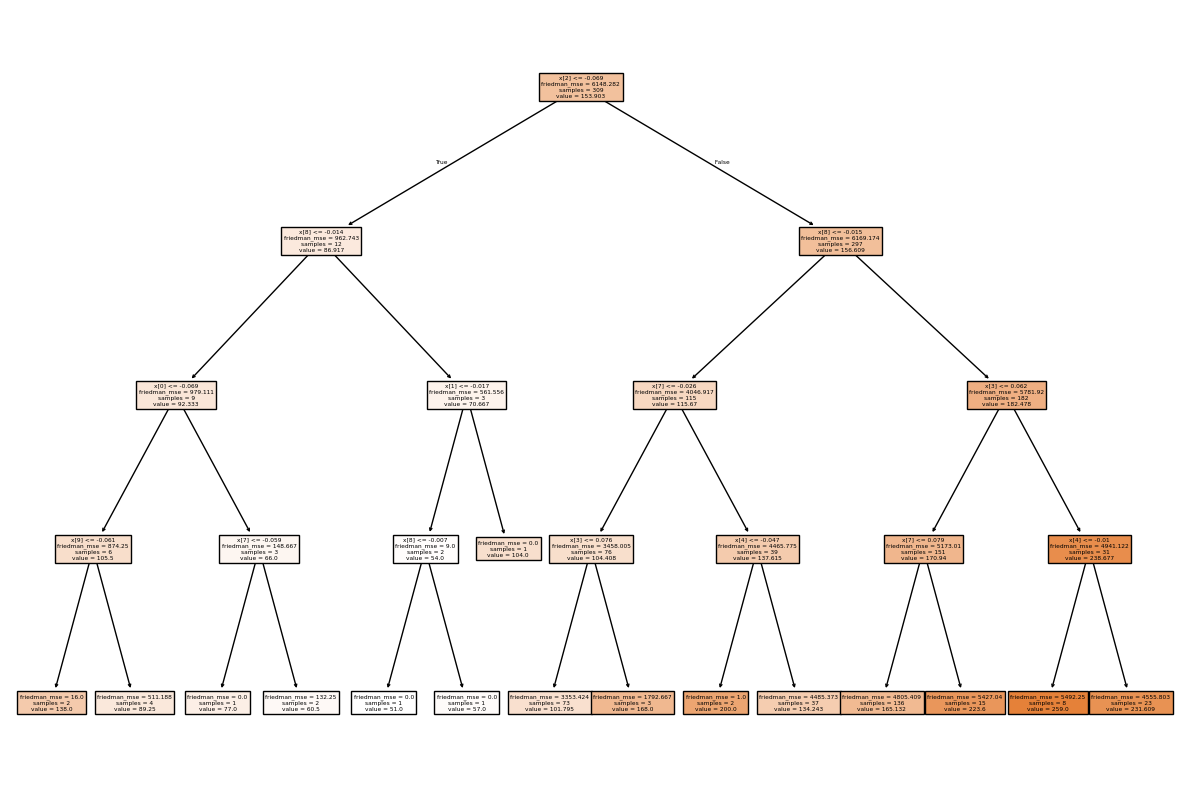

In [25]:
##Visualize the Decision Tree
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(selectedmodel,filled=True)

## Random Forest

In [26]:
df_diabetes.isnull().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

In [27]:
df_diabetes.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641

In [28]:
## Getting All Different Types OF Features
num_features = [feature for feature in df_diabetes.columns if df_diabetes[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))
cat_features = [feature for feature in df_diabetes.columns if df_diabetes[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))
discrete_features=[feature for feature in num_features if len(df_diabetes[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Numerical Features : 10
Num of Categorical Features : 0
Num of Discrete Features : 1
Num of Continuous Features : 9


In [29]:
#Independent and dependent Features
X=df_diabetes
y=dataset['target']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [30]:
X.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641

## Model Training and Model Selection

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [32]:
##Create a Function to Evaluate Model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [33]:
## Beginning Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
   
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 54.0745
- Mean Absolute Error: 44.0978
- R2 Score: 0.5244
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 53.1202
- Mean Absolute Error: 41.9194
- R2 Score: 0.4773


Lasso
Model performance for Training set
- Root Mean Squared Error: 62.9149
- Mean Absolute Error: 53.9997
- R2 Score: 0.3562
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 58.6913
- Mean Absolute Error: 49.2079
- R2 Score: 0.3619


Ridge
Model performance for Training set
- Root Mean Squared Error: 59.2863
- Mean Absolute Error: 50.2714
- R2 Score: 0.4283
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 55.7940
- Mean Absolute Error: 45.4635
- R2 Score: 0.4233


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 51.2559
- Mean Absolute Error: 41.0744
- R2 Score: 0.5727
---------

# Adaboost Model training

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [35]:
##Create a Function to Evaluate Model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [36]:
## Beginning Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Adaboost Regressor":AdaBoostRegressor()
   
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 54.0745
- Mean Absolute Error: 44.0978
- R2 Score: 0.5244
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 53.1202
- Mean Absolute Error: 41.9194
- R2 Score: 0.4773


Lasso
Model performance for Training set
- Root Mean Squared Error: 62.9149
- Mean Absolute Error: 53.9997
- R2 Score: 0.3562
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 58.6913
- Mean Absolute Error: 49.2079
- R2 Score: 0.3619


Ridge
Model performance for Training set
- Root Mean Squared Error: 59.2863
- Mean Absolute Error: 50.2714
- R2 Score: 0.4283
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 55.7940
- Mean Absolute Error: 45.4635
- R2 Score: 0.4233


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 51.2559
- Mean Absolute Error: 41.0744
- R2 Score: 0.5727
---------

## Hyperparameter Tuning

In [37]:
#Initialize few parameter for Hyperparamter tuning
knn_params = {"n_neighbors": [2, 3, 10, 20, 40, 50]}
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, 8,9],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

ada_params={
    "n_estimators":[50,60,70,80],
    "loss":['linear','square','exponential']
}

In [38]:
# Models list for Hyperparameter tuning
randomcv_models = [('KNN', KNeighborsRegressor(), knn_params),
                   ("RF", RandomForestRegressor(), rf_params),
                   ("Adaboost",AdaBoostRegressor(),ada_params)
                   
                   ]

In [39]:
##Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits
---------------- Best Params for KNN -------------------
{'n_neighbors': 10}
---------------- Best Params for RF -------------------
{'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 5, 'max_depth': 5}
---------------- Best Params for Adaboost -------------------
{'n_estimators': 80, 'loss': 'exponential'}


In [53]:
# Define the models with correct parameters
models = {
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, min_samples_split=5, max_features='sqrt', max_depth=5, 
                                                     n_jobs=-1),
    "K-Neighbors Regressor": KNeighborsRegressor(n_neighbors=10, n_jobs=-1),
    "Adaboost": AdaBoostRegressor(n_estimators=60, loss='linear')
}

# Loop through each model and evaluate performance
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate the model performance
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    # Print performance metrics
    print(model_name)
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('=' * 35)
    print('\n')


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 42.5877
- Mean Absolute Error: 36.0873
- R2 Score: 0.7050
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 51.8680
- Mean Absolute Error: 41.8436
- R2 Score: 0.5016


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 54.2260
- Mean Absolute Error: 43.5204
- R2 Score: 0.5217
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 56.1826
- Mean Absolute Error: 44.7293
- R2 Score: 0.4153


Adaboost
Model performance for Training set
- Root Mean Squared Error: 46.7122
- Mean Absolute Error: 41.2651
- R2 Score: 0.6451
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 53.2061
- Mean Absolute Error: 42.9215
- R2 Score: 0.4756




In [41]:
from sklearn.model_selection import cross_val_score

for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    print(f"{model_name} - Cross-Validation RMSE: {(-cv_scores.mean())**0.5:.4f}")


Random Forest Regressor - Cross-Validation RMSE: 59.6308
K-Neighbors Regressor - Cross-Validation RMSE: 60.0364
Adaboost - Cross-Validation RMSE: 59.8214


## Gradient Boosting

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [57]:
##Create a Function to Evaluate Model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [58]:
## Beginning Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Adaboost Regressor":AdaBoostRegressor(),
    "Graident BoostRegressor":GradientBoostingRegressor()
   
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 54.0745
- Mean Absolute Error: 44.0978
- R2 Score: 0.5244
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 53.1202
- Mean Absolute Error: 41.9194
- R2 Score: 0.4773


Lasso
Model performance for Training set
- Root Mean Squared Error: 62.9149
- Mean Absolute Error: 53.9997
- R2 Score: 0.3562
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 58.6913
- Mean Absolute Error: 49.2079
- R2 Score: 0.3619


Ridge
Model performance for Training set
- Root Mean Squared Error: 59.2863
- Mean Absolute Error: 50.2714
- R2 Score: 0.4283
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 55.7940
- Mean Absolute Error: 45.4635
- R2 Score: 0.4233


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 51.2559
- Mean Absolute Error: 41.0744
- R2 Score: 0.5727
---------